In [43]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [44]:
X, y = make_regression(n_features=1, bias=100, noise=10, random_state=42)

In [45]:
X.shape

(100, 1)

In [46]:
y.shape

(100,)

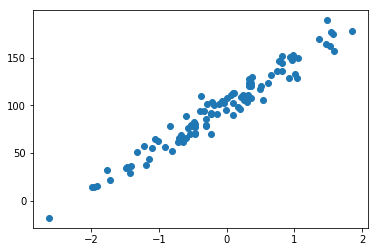

In [47]:
plt.scatter(X, y)

In [48]:
# X = np.random.randn(100, 1)*100 + 100
# noise = np.random.randn(100)*200

# coef = 10
# bias = 30

# y = coef * X + bias + noise

# plt.scatter(X, y)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [49]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

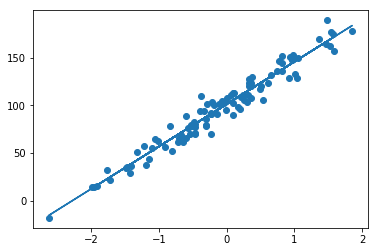

In [53]:
plt.scatter(X, y)
plt.plot(X, model.predict(X))


array([9.03616177])

In [96]:
class LinearRegCustom:
    
    def __init__(self, lr=.1, max_iter=20):
        
        self.lr = lr
        self.max_iter = max_iter
        
    def fit(self, X, y):
        self._X = X
        self._y = y.reshape(-1, 1)
        
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        errors = []
        for i in range(self.max_iter):
            self.gradient_dencend()
            errors.append(self.error())
#             print(self.coef_, self.intercept_)
        
        return errors
            
    def gradient_dencend(self):
        
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yp = self.hypothesis(self._X)
        
        d_coef = ((yp - self._y) * self._X).mean()
        d_intercept = ((yp - self._y)).mean()
        
        return d_coef, d_intercept
        
    def hypothesis(self, X):
        return self.coef_ * X + self.intercept_
    
    def predict(self, X):
        return self.hypothesis(X).flatten()
    
    def error(self):
        ya = self._y
        yp = self.hypothesis(self._X)
        
        return ((yp-ya)**2).mean()
    
    
        

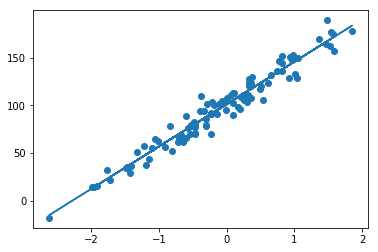

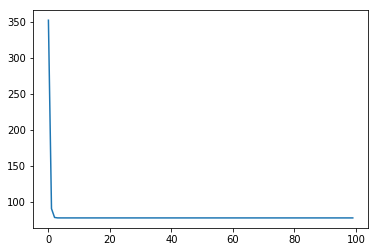

In [97]:
model = LinearRegCustom(lr=1, max_iter=100)

errors = model.fit(X, y)

plt.figure()
plt.scatter(X, y)
plt.plot(X, model.predict(X))

plt.figure()
plt.plot(errors)


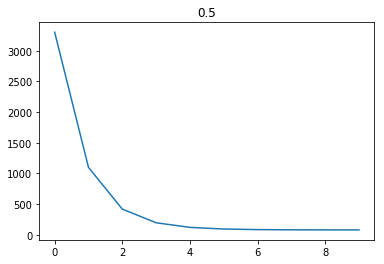

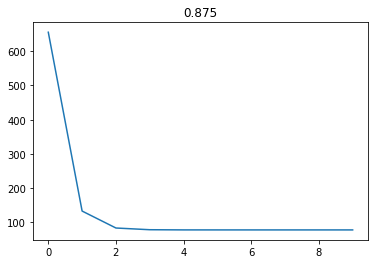

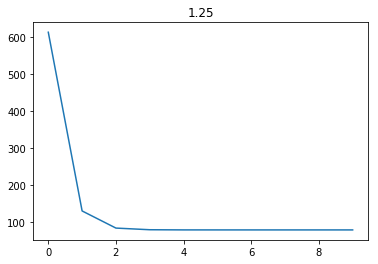

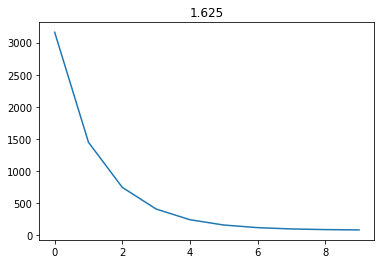

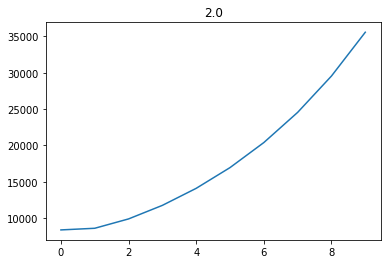

In [101]:
for lr in np.linspace(.5, 2, 5):

    model = LinearRegCustom(lr=lr, max_iter=10)
    errors = model.fit(X, y)
    plt.figure()
    plt.title(str(lr))
    plt.plot(errors)